In [91]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections
import pandas as pd
import os
import json

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [4]:
base_path = os.getcwd() + '/RoadDamageDataset/'

damageTypes=["None", "D00", "D10", "D20", "D40"]

#{D00: Longitudinal Crack, D10: Transverse Crack, D20: Aligator Crack, D40: Pothole}

# govs.
govs = ["Czech", "India", "Japan"]

## JSON file creation from annotation.txt

In [165]:
images = []

def format_as_json():
    annotations = open("annotation.txt", "r")
    for data in annotations:
        line = data.strip().split(',')
        key = line[0]
        if(line[1]==''):
            line[1] = '0'
        obj = line[1].split()
        image = {
            key: [
                {
                    'class': obj[0],
                    'location': ' '.join(map(str, obj[1:5])),
                }
            ]
        }

        index=5
        while(len(obj[index:])!=0):
            image[key].append({
                'class': obj[index],
                'location': ' '.join(map(str, obj[index+1:index+5])),
            })
            index=index+5

        images.append(image)

    annotations.close()

def save_as_json():
    with open('data.json', 'w') as fp:
        json.dump(images, fp)

format_as_json()
save_as_json()

## DataFrame file creation from annotation.txt

In [264]:
def dataframe_creation():
    keys = []
    classes = []
    objects = []
    damages = []
    countries = []
    
    annotations = open("annotation.txt", "r")
    for data in annotations:
        line = data.strip().split(',')
        if(line[1]==''):
            line[1] = '0'
        objs = line[1].split()
        
        key = line[0]
        obj = ' '.join(map(str, objs[1:5]))
        country = key.split('_')[0]
        
        keys.append(key)
        classes.append(int(objs[0]))
        damages.append(damageTypes[int(objs[0])])
        objects.append(obj if len(obj)!=0 else "None")
        countries.append(country)

        index=5
        while(len(objs[index:])!=0):
            keys.append(key)
            classes.append(int(objs[index]))
            damages.append(damageTypes[int(objs[index])])
            obj = ' '.join(map(str, objs[index+1:index+5]))
            objects.append(obj if len(obj)!=0 else "None")
            countries.append(country)
            index = index + 5
    
    frame = {'image': keys, 'class': classes, 'damage_type': damages, 'object': objects, 'country': countries}
    df = pd.DataFrame(frame)
    return df

df = dataframe_creation()
with pd.ExcelWriter('data.xlsx') as writer:  
    df.to_excel(writer, sheet_name='Sheet') 

In [265]:
df.head()

,image,class,damage_type,object,country
0,Czech_003090.jpg,0,None,None,Czech
1,Japan_001851.jpg,1,D00,37 422 151 590,Japan
2,Japan_007255.jpg,0,None,None,Japan
3,Japan_005918.jpg,0,None,None,Japan
4,Japan_004468.jpg,3,D20,427 436 594 587,Japan


Text(0.5, 1.0, 'Damage Type Classes Frequency')

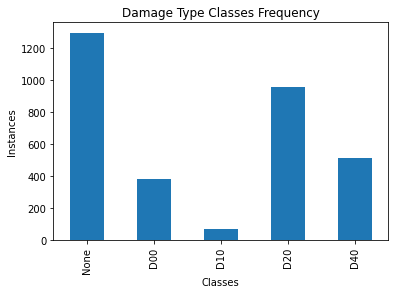

In [329]:
bar = df["class"].value_counts()
bar = bar.sort_index()
bar.plot(kind="bar")

plt.xticks((0, 1, 2, 3, 4), ("None", "D00", "D10", "D20", "D40"))
plt.xlabel("Classes")
plt.ylabel("Instances")
plt.title("Damage Type Classes Frequency")

## Numpy Array of Images